### Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%shell
git clone https://github.com/adeshkin/classification_dogs.git --quiet
pip install -r classification_dogs/scripts/requirements.txt --quiet

### Данные

In [ ]:
from classification_dogs.scripts.dataset import get_ds
from classification_dogs.scripts.utils import plot_class_dist, plot_size_dist, show_rand_img, show_aug_img

data_dir = '/content/drive/MyDrive/classification_dogs/data/imagewoof2-160'

**Подготовка данных** 

In [ ]:
%%shell
cd classification_dogs/data 
bash download_data.sh
python prepare_data.py

**Распределение**

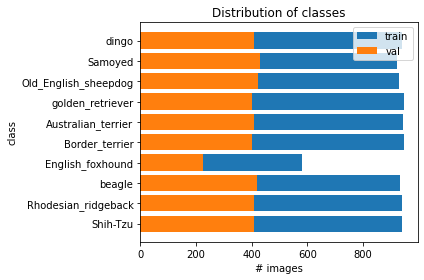

In [ ]:
plot_class_dist(data_dir)

height = [160, 391]
width = [160, 615]


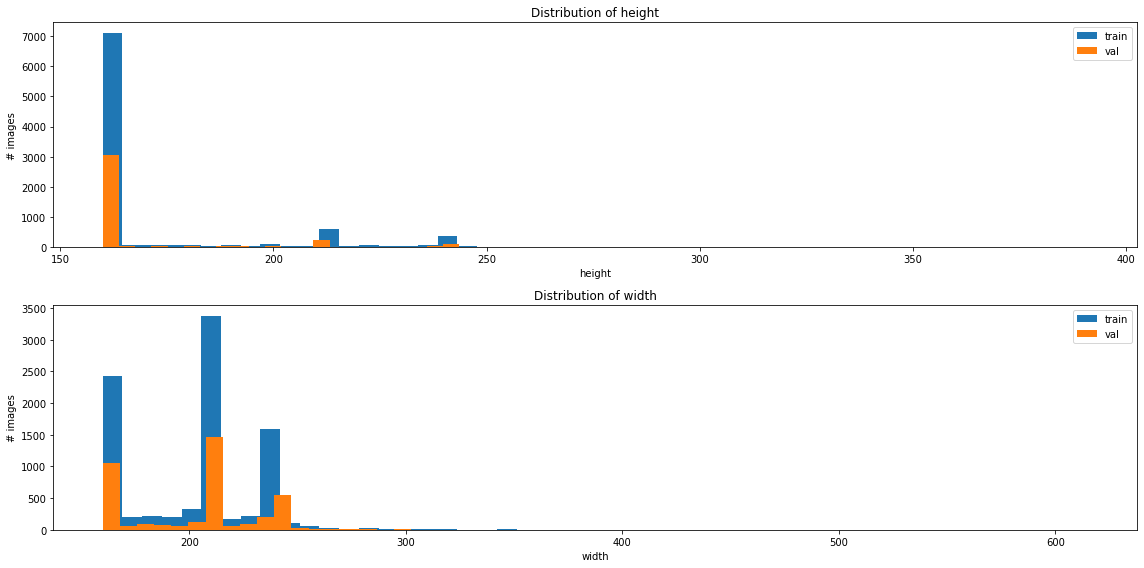

In [ ]:
plot_size_dist(data_dir)

**Примеры**

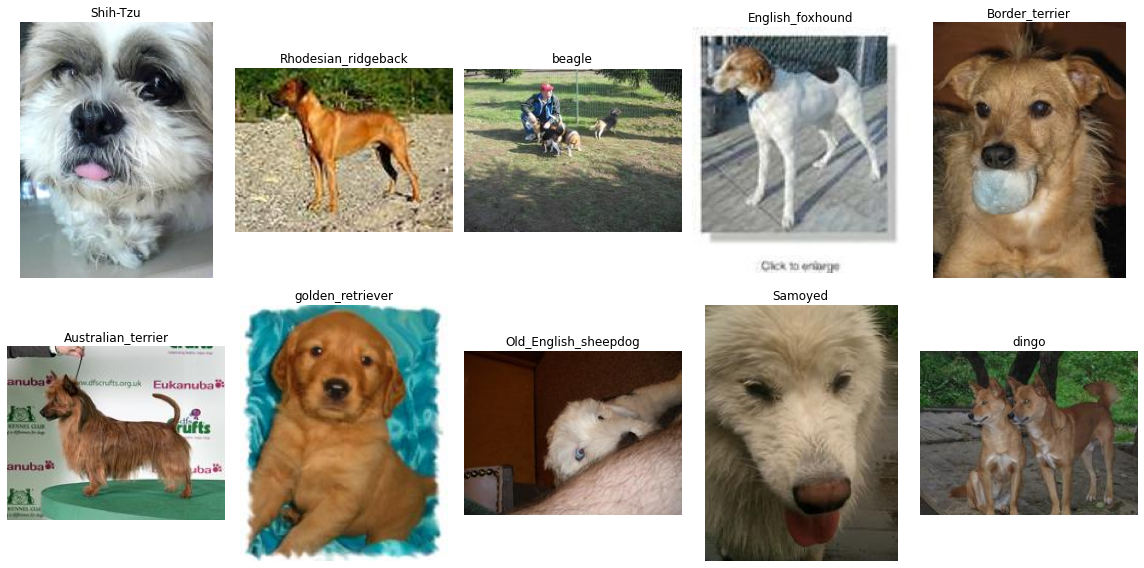

In [ ]:
show_rand_img(data_dir)

**Аугментации**

Compose([
  Resize(always_apply=False, p=1, height=160, width=160, interpolation=1),
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit=(-0.05, 0.05), scale_limit=(-0.050000000000000044, 0.050000000000000044), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  CoarseDropout(always_apply=False, p=0.5, max_holes=2, max_height=60, max_width=60, min_holes=2, min_height=10, min_width=10),
  GaussNoise(always_apply=False, p=0.5, var_limit=(10, 50)),
  RGBShift(always_apply=False, p=0.5, r_shift_limit=(-15, 15), g_shift_limit=(-15, 15), b_shift_limit=(-15, 15)),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  Normalize(always_apply=False, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, b

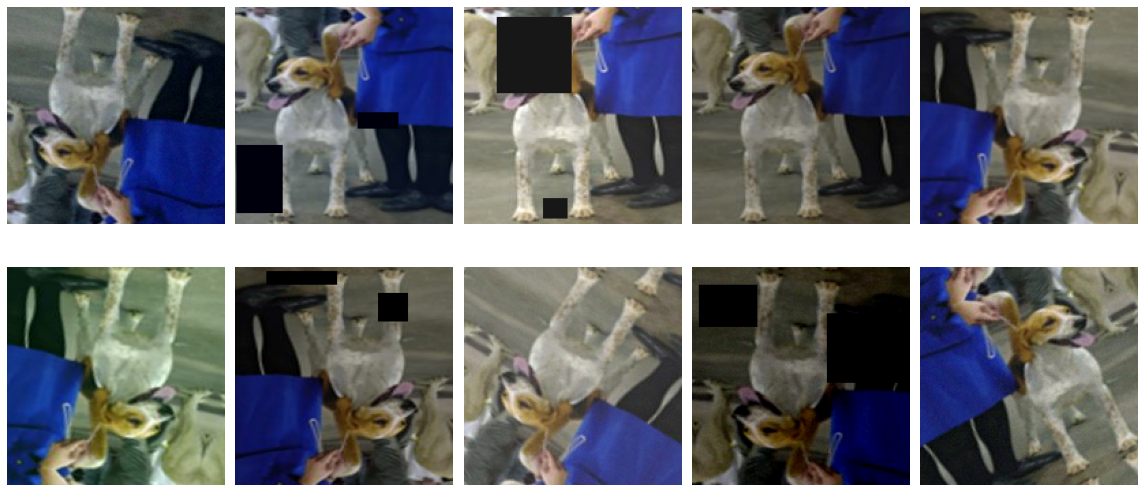

In [ ]:
from classification_dogs.scripts.dataset import get_ds


dataset = get_ds(data_dir)['train']
print(dataset.transform)
show_aug_img(dataset)